<a href="https://colab.research.google.com/github/alinaagul/Emotions-Detection-System-/blob/main/Emotions_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

**Building our Model To train the data**


* Devising a Custom Algorithm using MobileNet*

In [ ]:
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

Preparing our data using data generator


Implementation of the Custom Algorithm with Transfer Learning:

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)

train_data = train_datagen.flow_from_directory(
    directory="/content/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )



Found 7178 images belonging to 7 classes.


**visualizaing the data that is fed to train data gen**

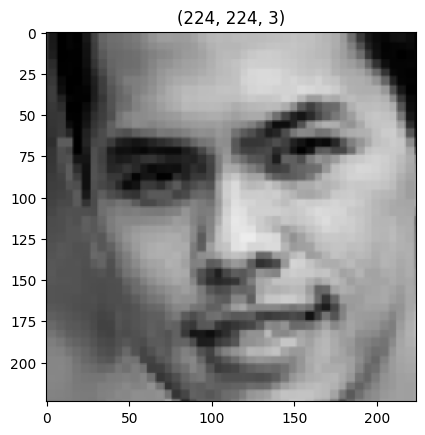

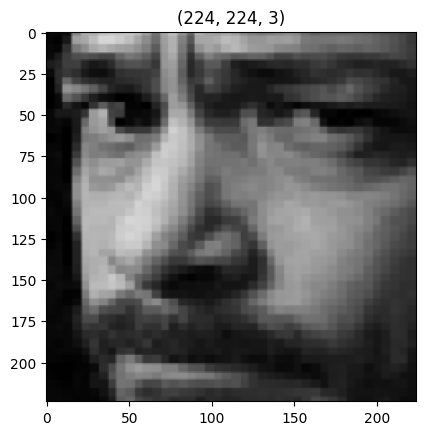

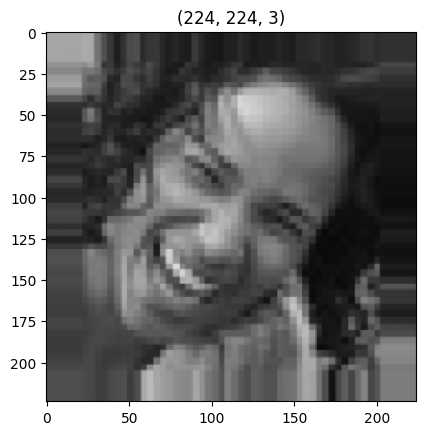

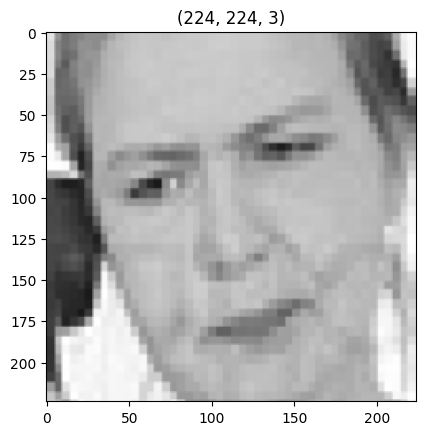

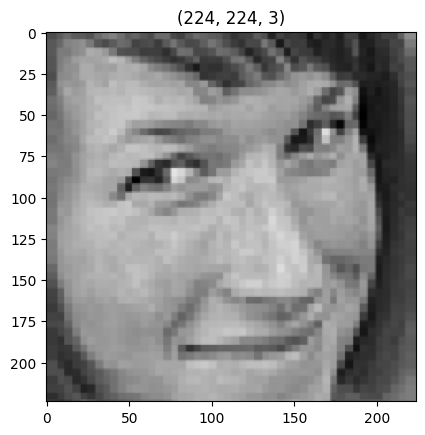

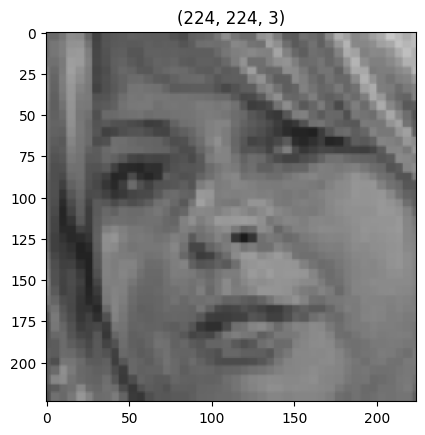

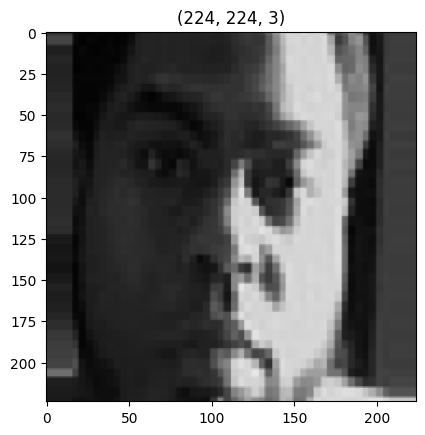

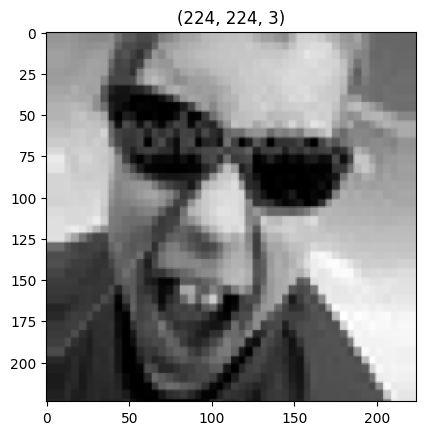

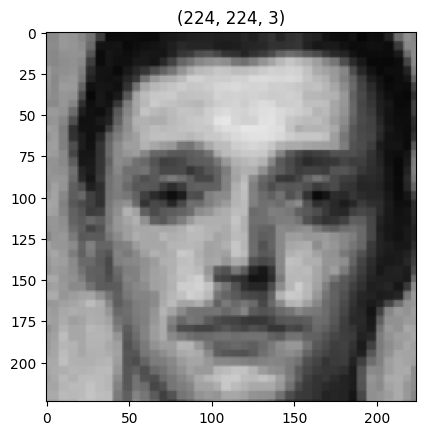

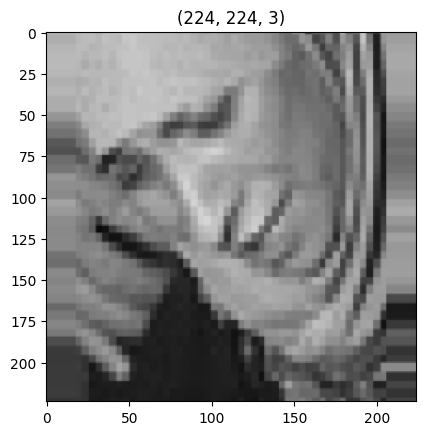

In [ ]:
# to visualize the images in the traing data denerator

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

**having early stopping and model check point**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Compile your model with accuracy as a metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

# Define model checkpoint
mc = ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# Put callbacks in a list
callbacks_list = [es, mc]

In [ ]:
history = model.fit(train_data,
                    epochs=30,
                    steps_per_epoch=len(train_data),
                    validation_data=val_data,
                    validation_steps=len(val_data),
                    callbacks=callbacks_list)

Epoch 1/30
898/898 [==============================] - ETA: 0s - loss: 6.9369 - accuracy: 0.6447
Epoch 1: val_accuracy improved from -inf to 0.53483, saving model to best_model.h5
898/898 [==============================] - 349s 384ms/step - loss: 6.9369 - accuracy: 0.6447 - val_loss: 12.0594 - val_accuracy: 0.5348
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


898/898 [==============================] - ETA: 0s - loss: 6.9518 - accuracy: 0.6488
Epoch 2: val_accuracy improved from 0.53483 to 0.55155, saving model to best_model.h5
898/898 [==============================] - 335s 373ms/step - loss: 6.9518 - accuracy: 0.6488 - val_loss: 11.5445 - val_accuracy: 0.5515
Epoch 3/30
898/898 [==============================] - ETA: 0s - loss: 7.0380 - accuracy: 0.6543
Epoch 3: val_accuracy did not improve from 0.55155
898/898 [==============================] - 333s 371ms/step - loss: 7.0380 - accuracy: 0.6543 - val_loss: 13.0800 - val_accuracy: 0.5266
Epoch 4/30
898/898 [==============================] - ETA: 0s - loss: 7.0782 - accuracy: 0.6617
Epoch 4: val_accuracy did not improve from 0.55155
898/898 [==============================] - 344s 383ms/step - loss: 7.0782 - accuracy: 0.6617 - val_loss: 15.5172 - val_accuracy: 0.5251
Epoch 5/30
898/898 [==============================] - ETA: 0s - loss: 7.0956 - accuracy: 0.6624
Epoch 5: val_accuracy did not i

In [ ]:
from keras.models import load_model
from keras.layers import Conv2D, DepthwiseConv2D
from keras import backend as K

class CustomDepthwiseConv2D(DepthwiseConv2D):
    def __init__(self, **kwargs):
        super(CustomDepthwiseConv2D, self).__init__(**kwargs)

    def build(self, input_shape):
        if len(input_shape) < 4:
            raise ValueError('Inputs to `CustomDepthwiseConv2D` should have rank 4. '
                             'Received input shape:', str(input_shape))
        if self.data_format == 'channels_first':
            channel_axis = 1
        else:
            channel_axis = 3
        if input_shape[channel_axis] is None:
            raise ValueError('The channel dimension of the inputs to '
                             '`CustomDepthwiseConv2D` should be defined. Found `None`.')
        input_dim = int(input_shape[channel_axis])
        depthwise_kernel_shape = (self.kernel_size[0],
                                  self.kernel_size[1],
                                  input_dim,
                                  self.depth_multiplier)
        self.depthwise_kernel = self.add_weight(shape=depthwise_kernel_shape,
                                                initializer=self.depthwise_initializer,
                                                name='depthwise_kernel',
                                                regularizer=self.depthwise_regularizer,
                                                constraint=self.depthwise_constraint)
        if self.use_bias:
            self.bias = self.add_weight(shape=(input_dim * self.depth_multiplier,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
        self.built = True

# Define a custom function to load the model
def load_model_custom(filepath):
    # Define custom objects with the custom DepthwiseConv2D class
    custom_objects = {'CustomDepthwiseConv2D': CustomDepthwiseConv2D}
    # Load the model with custom objects
    return load_model(filepath, custom_objects=custom_objects)

# Load the model using the custom function
model = load_model_custom("/content/modified_best_model.h5")


In [ ]:
from keras.models import load_model
from keras.layers import DepthwiseConv2D

# Define a custom function to load the model
def load_model_custom(filepath):
    # Define custom objects with a custom DepthwiseConv2D class
    custom_objects = {'DepthwiseConv2D': DepthwiseConv2D}
    # Load the model with custom objects
    model = load_model(filepath, custom_objects=custom_objects)
    # Set groups=None for each DepthwiseConv2D layer
    for layer in model.layers:
        if isinstance(layer, DepthwiseConv2D):
            layer_config = layer.get_config()
            layer_config['groups'] = None
            layer = DepthwiseConv2D.from_config(layer_config)
    return model

# Load the model using the custom function
model = load_model_custom("/content/modified_best_model.h5")


In [ ]:
# Save the modified model
model.save("modified_best_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
h = history.history
print(h.keys())

NameError: name 'history' is not defined

Evaluation of the Custom Algorithm with MobileNet:

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy and validation accuracy
plt.plot(h['accuracy'], label='Training Accuracy', linestyle='-', color='blue')
plt.plot(h['val_accuracy'], label='Validation Accuracy', linestyle='--', color='red')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'h' is not defined

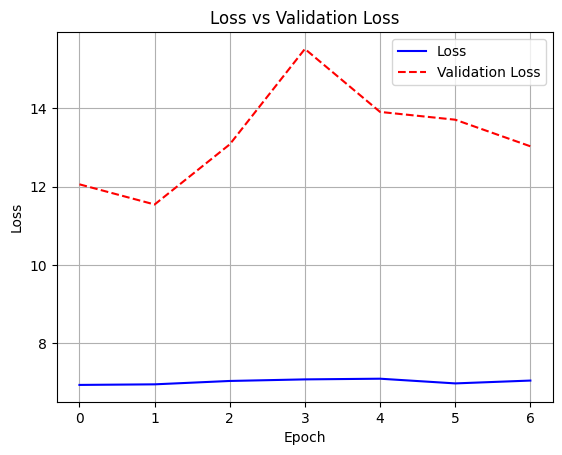

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy and validation accuracy
plt.plot(h['loss'], label='Loss', linestyle='-', color='blue')
plt.plot(h['val_loss'], label='Validation Loss', linestyle='--', color='red')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Create a dictionary mapping output values to class labels
op = dict(zip(train_data.class_indices.values(), train_data.class_indices.keys()))

# Print the dictionary
print(op)


{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


1/1 [==============================] - 3s 3s/step
The image is of happy


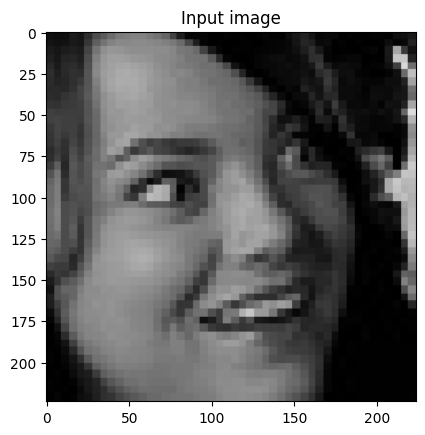

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Path for the image
path = "/content/train/happy/Training_10066226.jpg"

# Load the image and resize it
img = load_img(path, target_size=(224,224))

# Convert image to array and normalize
i = img_to_array(img) / 255
input_arr = np.array([i])

# Make prediction
pred = np.argmax(model.predict(input_arr))

# Print the predicted class
print(f"The image is of {op[pred]}")

# Display the image
plt.imshow(img)
plt.title("Input image")
plt.show()


Enter the path to the photo (or 'q' to quit): /content/angry.jpg


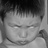

1/1 [==============================] - 1s 613ms/step
Predicted Emotion: angry
Enter the path to the photo (or 'q' to quit): /content/disgust.jpg


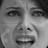

1/1 [==============================] - 0s 20ms/step
Predicted Emotion: disgust
Enter the path to the photo (or 'q' to quit): /content/fear.jpg


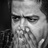

1/1 [==============================] - 0s 20ms/step
Predicted Emotion: fear
Enter the path to the photo (or 'q' to quit): /content/happy.jpg


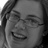

1/1 [==============================] - 0s 20ms/step
Predicted Emotion: happy
Enter the path to the photo (or 'q' to quit): /content/neutral.jpg


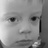

1/1 [==============================] - 0s 34ms/step
Predicted Emotion: neutral
Enter the path to the photo (or 'q' to quit): /content/sad.jpg


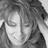

1/1 [==============================] - 0s 20ms/step
Predicted Emotion: sad
Enter the path to the photo (or 'q' to quit): /content/surprise.jpg


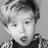

1/1 [==============================] - 0s 21ms/step
Predicted Emotion: surprise
Enter the path to the photo (or 'q' to quit): q


In [ ]:
import cv2
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from IPython.display import display, Image

# Load the trained model
model_path = '/content/modified_best_model.h5'  # Update the path accordingly
model = load_model(model_path)

# Define a dictionary mapping output values to class labels
class_labels = {
    0: 'angry',
    1: 'disgust',
    2: 'fear',
    3: 'happy',
    4: 'neutral',
    5: 'sad',
    6: 'surprise'
}

# Function to preprocess the image
def preprocess_image(image):
    try:
        image = cv2.resize(image, (224, 224))
        image = img_to_array(image) / 255.0
        image = np.expand_dims(image, axis=0)
        return image
    except Exception as e:
        print("Error preprocessing image:", e)
        return None

# Function to predict emotion from an image
def predict_emotion(image, model):
    try:
        # Preprocess the image
        preprocessed_image = preprocess_image(image)
        if preprocessed_image is not None:
            # Make prediction
            prediction = model.predict(preprocessed_image)
            predicted_class = np.argmax(prediction)

            # Get the corresponding label
            predicted_label = class_labels[predicted_class]

            return predicted_label
        else:
            return "Error: Image preprocessing failed"
    except Exception as e:
        return "Error predicting emotion:", e

# Continuously prompt the user to enter the path to a photo and analyze it
while True:
    # Prompt user to enter path to the photo
    photo_path = input("Enter the path to the photo (or 'q' to quit): ")

    # Check if the user wants to quit
    if photo_path.lower() == 'q':
        break

    # Display the photo
    display(Image(photo_path))

    # Load the captured image and perform emotion detection
    if photo_path:
        image = cv2.imread(photo_path)
        if image is not None:
            # Predict the emotion and print the result
            predicted_emotion = predict_emotion(image, model)
            print("Predicted Emotion:", predicted_emotion)
        else:
            print("Error: Failed to load image.")
